In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df_1 = pd.read_csv('train.csv')
df_2 = pd.read_csv('test.csv')
if 'SalesPrice' not in df_2.columns:
    df_2['SalePrice'] = 0

df = pd.concat([df_1, df_2], axis = 0)
df = df.set_index('Id')

In [15]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index]

In [27]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

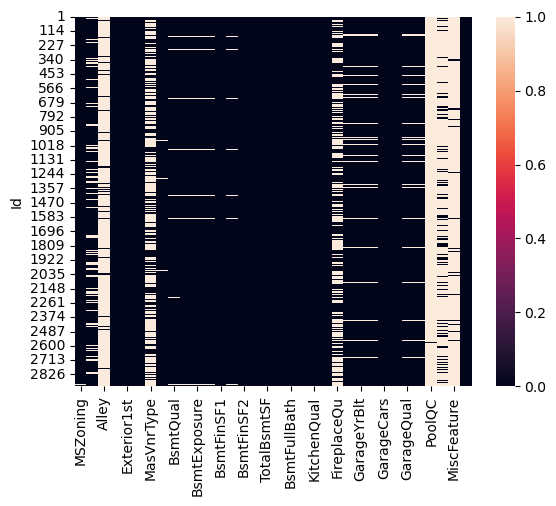

In [29]:
sns.heatmap(df_null.isnull())

In [33]:
df_objects = df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

In [35]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

df_objects = df_objects.fillna('null')

df_objects_encoded = pd.get_dummies(df_objects)

In [37]:
df_objects['Utilities'].value_counts()

Utilities
AllPub    2916
null         2
NoSeWa       1
Name: count, dtype: int64

In [39]:
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [41]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [45]:
new_df = pd.concat([df, df_objects_encoded], axis = 1)

In [47]:
len(new_df.columns)

304

In [49]:
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

In [51]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)

new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [57]:
import numpy as np

In [59]:
Mode_columns = ['GarageCars','GarageYrBlt','BsmtFullBath','BsmtHalfBath']
Mean_columns = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea']

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0]

Series([], dtype: int64)

In [61]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]
testiing_data = testing_data.drop(columns='SalePrice')

<h3>Training Section</h3>

In [ ]:
%pip install xgboost

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [75]:
x = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test,(-1,1))
x_train.shape, y_train.shape

((1168, 266), (1168, 1))

In [89]:
model_1 = LinearRegression()
model_1.fit(x, y)
y_pred = model_1.predict(x_test)
mean_squared_error(y_test, y_pred)

410261857.3863369

In [91]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1)
model_2.fit(x, y)
y_pred = model_2.predict(x_test)
mean_squared_error(y_test, y_pred)

4157.926123475375

In [93]:
model_3 = RandomForestRegressor(n_estimators=100)
model_3.fit(x, y)
y_pred = model_3.predict(x_test)
mean_squared_error(y_test, y_pred)

114273930.13245173

In [99]:
pred = model_2.predict(testiing_data)

final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = pred

final.to_csv('output.csv', index=False)

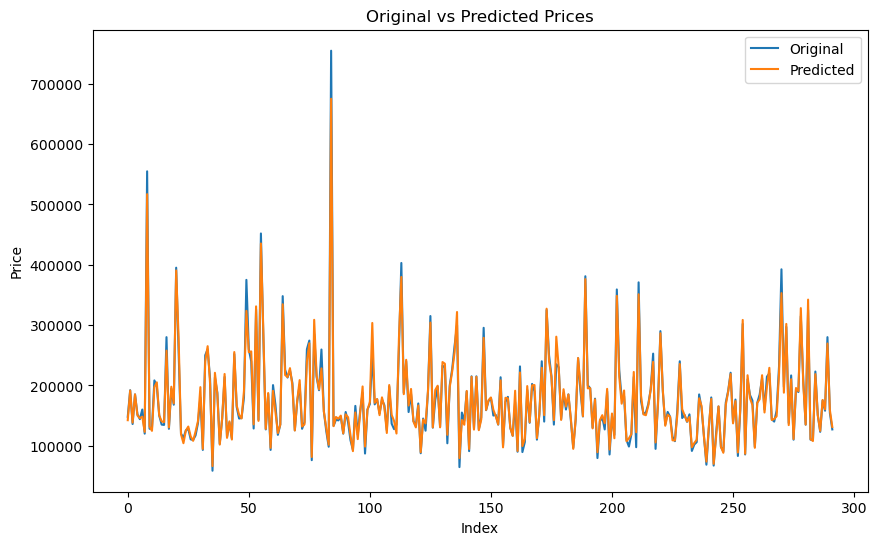

In [105]:
sort_indices = np.argsort(y_test)

plt.figure(figsize=(10,6))
plt.plot(np.arange(len(y_test)), y_test, label='Original')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.savefig('Housing.png')
plt.show()